<a href="https://colab.research.google.com/github/Rajaykumar12/Convolutional_network/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# This cell imports the necessary libraries for the script. These libraries are crucial for various tasks including loading and processing data, building and training neural networks, and visualizing the results.
# - tensorflow (imported as tf): A powerful open-source library for machine learning and deep learning, used here for building and training the neural network model.
# - matplotlib.pyplot (imported as plt): A plotting library used for creating visualizations, such as plotting the training and validation accuracy and loss curves.
# - sklearn.model_selection: A scikit-learn module used for splitting data, specifically the train_test_split function for dividing the dataset into training and validation sets.
# - numpy (imported as np): A fundamental package for scientific computing in Python, used for numerical operations on arrays and matrices.
# - pandas (imported as pd): A data manipulation and analysis library, although not directly used in this specific script, it's a common library for data handling in data science workflows.
# - tensorflow.keras.preprocessing.image.ImageDataGenerator: Used for real-time data augmentation, which helps in increasing the size and diversity of the training dataset.
# - tensorflow.keras.callbacks.EarlyStopping: A callback function used during model training to stop training when a monitored metric has stopped improving, preventing overfitting.

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# This cell loads the MNIST dataset, a widely used dataset of handwritten digits.
# The dataset is split into training and testing sets and loaded into the following variables:
# - train_images: Contains the images for training.
# - train_labels: Contains the corresponding labels (digits) for the training images.
# - test_images: Contains the images for testing.
# - test_labels: Contains the corresponding labels for the testing images.
# Additionally, the cell visualizes the first image from the training set using matplotlib to show an example of the data. The title of the plot displays the label of the image, indicating the actual digit it represents.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


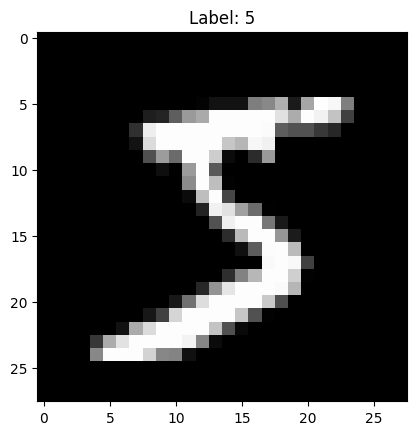

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()


plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()

In [ ]:
# This cell displays the shape of the 'train_images' array.
# The output (60000, 28, 28) indicates that there are 60,000 training images,
# each with a height of 28 pixels and a width of 28 pixels.

# This cell displays the shape of the 'test_images' array.
# The output (10000, 28, 28) indicates that there are 10,000 testing images,
# each with a height of 28 pixels and a width of 28 pixels.

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
# This cell performs normalization on the image data.
# Normalization is a crucial preprocessing step that scales the pixel values of the images to a specific range, typically between 0 and 1.
# This is achieved by dividing each pixel value in both the training and testing image datasets ('train_images' and 'test_images') by 255.0, which is the maximum possible pixel value in an 8-bit grayscale image.
# Normalizing the data helps improve the performance and stability of the neural network model during training.

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
# This cell splits the original training data into new training and validation sets using `train_test_split` from scikit-learn.
# - `train_images` and `train_labels` are the input data to be split.
# - `test_size=0.2` allocates 20% of the original training data for the validation set.
# - `random_state=42` ensures that the data split is the same every time the code is run, making the results reproducible.
# The resulting datasets are stored in `train_images`, `val_images`, `train_labels`, and `val_labels`.

In [ ]:
from sklearn.model_selection import train_test_split

train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

In [ ]:
# This cell sets up data augmentation for the training images using `ImageDataGenerator` from Keras.
# Data augmentation is a technique used to artificially increase the size and variability of the training dataset
# by applying random transformations to the existing images. This helps to improve the model's ability to generalize
# to unseen data and can prevent overfitting.
# The `ImageDataGenerator` is configured with the following augmentation parameters:
# - rotation_range=10: Randomly rotates images by a maximum of 10 degrees.
# - zoom_range=0.1: Randomly zooms in or out on images by up to 10%.
# - width_shift_range=0.1: Randomly shifts images horizontally by up to 10% of the total width.
# - height_shift_range=0.1: Randomly shifts images vertically by up to 10% of the total height.
# Finally, `datagen.fit(train_images.reshape(-1, 28, 28, 1))` fits the data generator to the training images.
# The images are reshaped to include a channel dimension (1 for grayscale) as required by the generator.

In [ ]:
datagen = ImageDataGenerator(
    rotation_range = 10,
    zoom_range = 0.1,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

datagen.fit(train_images.reshape(-1, 28, 28, 1))

In [ ]:
# This cell defines the architecture of the neural network model using TensorFlow's Keras Sequential API.
# A Sequential model is a linear stack of layers.
# The model is built layer by layer as follows:
# - tf.keras.layers.Flatten(input_shape=(28, 28)): This is the input layer. It flattens the 28x28 pixel images into a 1D array of 784 pixels, preparing them for the subsequent dense layers.
# - tf.keras.layers.BatchNormalization(): This layer normalizes the activations of the previous layer. Batch normalization helps stabilize and accelerate the training process by reducing internal covariate shift.
# - tf.keras.layers.Dense(128, activation='relu'): This is the first hidden layer. It's a densely connected layer with 128 neurons. The 'relu' (Rectified Linear Unit) activation function is used, which introduces non-linearity into the model.
# - tf.keras.layers.Dropout(0.2): This layer implements dropout regularization. It randomly sets 20% of the input units to 0 during training, which helps prevent overfitting by making the network less reliant on specific neurons.
# - tf.keras.layers.BatchNormalization(): Another batch normalization layer to normalize the output of the previous dense layer.
# - tf.keras.layers.Dense(64, activation='relu'): This is the second hidden layer, a densely connected layer with 64 neurons and a 'relu' activation function.
# - tf.keras.layers.Dropout(0.2): Another dropout layer with a rate of 20% to further prevent overfitting.
# - tf.keras.layers.BatchNormalization(): A third batch normalization layer.
# - tf.keras.layers.Dense(10, activation='softmax'): This is the output layer. It's a densely connected layer with 10 neurons, one for each digit class (0-9). The 'softmax' activation function is used to produce a probability distribution over the 10 classes, where the output of each neuron represents the predicted probability of the input image belonging to that class.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# This cell defines an Early Stopping callback, which is a powerful tool used during model training to prevent overfitting.
# Early stopping monitors a specified metric (usually validation loss or accuracy) and stops the training process if the metric
# stops improving for a certain number of epochs, even if the total number of epochs specified for training has not been reached.
# This helps in finding the optimal number of training epochs, avoiding the point where the model starts to learn noise in the training data.

# The `EarlyStopping` callback is configured with the following parameters:
# - min_delta=0.001: This is the minimum change in the monitored metric (by default, validation loss) that is considered an improvement. Training will continue as long as the improvement is greater than this value.
# - patience=20: This is the number of epochs with no significant improvement (less than `min_delta`) after which training will be stopped. It provides a buffer to allow for potential fluctuations in the monitored metric.
# - restore_best_weights=True: If set to True, the model's weights will be restored to the values from the epoch with the best value of the monitored metric when training stops. This ensures that the final model has the best performance achieved during the training process.

In [ ]:
early_stopping = EarlyStopping(min_delta=0.001,
                               patience = 20,
                               restore_best_weights = True)

In [ ]:
# This cell compiles the neural network model, which is a necessary step before training.
# Compiling the model configures the learning process.
# The `compile()` method takes three key arguments:
# - optimizer='adam': This specifies the optimization algorithm used to update the model's weights during training. 'adam' is a popular and effective optimizer that adapts the learning rate during training.
# - loss='sparse_categorical_crossentropy': This defines the loss function, which measures how well the model's predictions match the actual labels. 'sparse_categorical_crossentropy' is suitable for multi-class classification problems where the labels are integers (like the MNIST digits). It calculates the loss between the predicted probability distribution and the true class label.
# - metrics=['accuracy']: This specifies the metric(s) used to evaluate the model's performance during training and testing. 'accuracy' is a common metric for classification problems, representing the proportion of correctly classified instances.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

In [ ]:
# This cell trains the neural network model using the `fit()` method.
# The `fit()` method is where the model learns from the training data.
# The arguments passed to the `fit()` method are:
# - `train_images` and `train_labels`: The training data and their corresponding labels. The model will learn the relationship between the images and their labels from this data.
# - `epochs=10`: This specifies the number of times the model will iterate over the entire training dataset. In this case, the model will see the full training data 10 times.
# - `validation_data=(val_images, val_labels)`: This is the data on which to evaluate the loss and any model metrics at the end of each epoch. It allows us to monitor the model's performance on unseen data as it trains.
# - `batch_size=32`: This is the number of samples per gradient update. The training data is divided into batches of 32 images, and the model's weights are updated after each batch.
# - `callbacks=[early_stopping]`: This is a list of callbacks to apply during training. Here, we use the `EarlyStopping` callback defined earlier to monitor the validation loss and stop training if it doesn't improve, which helps prevent overfitting.
# The training history, including metrics like accuracy and loss for both the training and validation sets for each epoch, is stored in the `history` object.

In [ ]:
history = model.fit(datagen.flow(train_images.reshape(-1, 28, 28, 1), train_labels, batch_size=32),
                    epochs=10,
                    validation_data=(val_images.reshape(-1, 28, 28, 1), val_labels),
                    callbacks= [early_stopping])

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.7978 - loss: 0.6524 - val_accuracy: 0.9794 - val_loss: 0.0657
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9547 - loss: 0.1508 - val_accuracy: 0.9852 - val_loss: 0.0506
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9635 - loss: 0.1252 - val_accuracy: 0.9817 - val_loss: 0.0600
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9702 - loss: 0.1047 - val_accuracy: 0.9849 - val_loss: 0.0524
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9728 - loss: 0.0914 - val_accuracy: 0.9862 - val_loss: 0.0455
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9754 - loss: 0.0825 - val_accuracy: 0.9880 - val_loss: 0.0356
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9788 - loss: 0.0727 - val_accuracy: 0.9902 - val_loss: 0.0345
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9799 - loss: 0.07

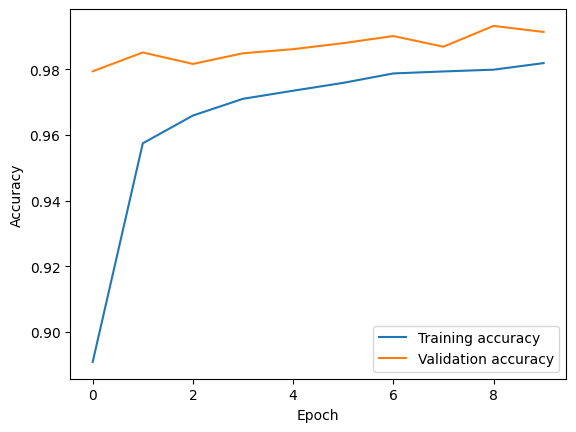

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

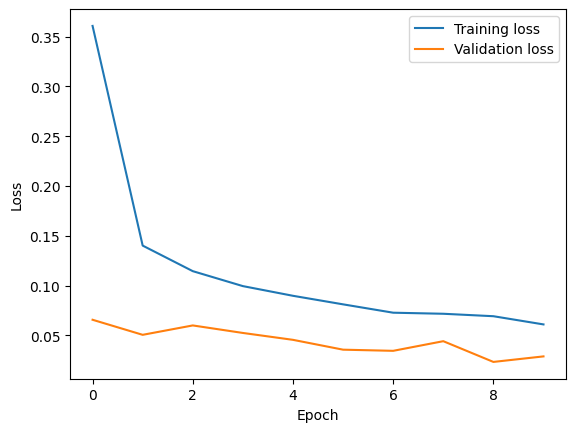

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label = 'Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()